# (Quick) Introduction to [JuliaSmoothOptimizers](https://juliasmoothoptimizers.github.io) Packages

## Modeling

`NLPModels` represents continuous optimization problems in the form
\begin{align*}
  \text{minimize} & \quad f(x) \\
  \text{subject to} & \quad c_L \leq c(x) \leq c_U \\
  & \quad \ell \leq x \leq u.
\end{align*}

Problems can come from many different sources:
* JuMP
* CUTEst
* AMPL
* written by hand with derivatives written by hand
* written by hand with derivatives computed by automatic differentiation

In [ ]:
using NLPModels

In [2]:
using NLPModelsJuMP, OptimizationProblems

In [3]:
model = MathProgNLPModel(hs97());

In [4]:
print(model.meta)

Minimization problem Generic
nvar = 6, ncon = 4 (0 linear)
lvar = 0.0   0.0   0.0   0.0  ⋯  0.0
uvar = 0.31   0.046   0.068   0.042  ⋯  0.0134
lcon = 0.0   0.0   0.0   0.0
ucon = Inf   Inf   Inf   Inf
x0 = 0.0   0.0   0.0   0.0  ⋯  0.0
y0 = 0.0   0.0   0.0   0.0
nnzh = 25
nnzj = 20
nonlinear constraints: 1   2   3   4


In [5]:
x = model.meta.x0;

In [6]:
obj(model, x)

0.0

In [7]:
grad(model, x)  # derivatives are computed by JuMP

6-element Array{Float64,1}:
  4.3
 31.8
 63.3
 15.8
 68.5
  4.7

In [8]:
hess(model, x, y=ones(model.meta.ncon))

6×6 SparseArrays.SparseMatrixCSC{Float64,Int64} with 11 stored entries:
  [1, 1]  =  0.0
  [3, 1]  =  -308.0
  [6, 1]  =  -14000.0
  [3, 3]  =  0.0
  [5, 3]  =  -3580.0
  [4, 4]  =  0.0
  [5, 4]  =  19740.0
  [6, 4]  =  -35100.0
  [5, 5]  =  0.0
  [6, 5]  =  -41500.0
  [6, 6]  =  0.0

In [9]:
cons(model, x)

4-element Array{Float64,1}:
 -32.97
 -25.12
  29.08
  78.02

In [10]:
jac(model, x)

4×6 SparseArrays.SparseMatrixCSC{Float64,Int64} with 20 stored entries:
  [1, 1]  =  17.1
  [2, 1]  =  17.9
  [4, 1]  =  159.9
  [1, 2]  =  38.2
  [2, 2]  =  36.8
  [3, 2]  =  -273.0
  [4, 2]  =  -311.0
  [1, 3]  =  204.2
  [2, 3]  =  113.9
  [1, 4]  =  212.3
  [2, 4]  =  169.7
  [3, 4]  =  -70.0
  [4, 4]  =  587.0
  [1, 5]  =  623.4
  [2, 5]  =  337.8
  [3, 5]  =  -819.0
  [4, 5]  =  391.0
  [1, 6]  =  1495.5
  [2, 6]  =  1385.2
  [4, 6]  =  2198.0

### Creating Your Own Problem

In [11]:
f(x) = (x[1] - 1)^2 + 100*(x[2] - x[1]^2)^2
x0 = [-1.2; 1.0]
nlp = ADNLPModel(f, x0, lvar=zeros(2), uvar=[0.4; 0.6])  # a simple bound-constrained problem

ADNLPModel(Minimization problem Generic
nvar = 2, ncon = 0 (0 linear)
, Counters(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), f, getfield(NLPModels, Symbol("##77#80"))())

In [12]:
grad(nlp, x0)  # derivative computed by ForwardDiff

2-element Array{Float64,1}:
 -215.59999999999997
  -87.99999999999999

### Accessing Existing Problem Collections

In [13]:
using CUTEst

┌ Info: Recompiling stale cache file /Users/dpo/.julia/compiled/v0.7/CUTEst/tNzSS.ji for CUTEst [1b53aba6-35b6-5f92-a507-53c67d53f819]
└ @ Base loading.jl:1185


In [14]:
model = CUTEstModel("NCVXQP1.SIF")

Minimization problem NCVXQP1
nvar = 10000, ncon = 5000 (5000 linear)


In [15]:
using UnicodePlots; spy(hess(model, model.meta.x0))

                      Sparsity Pattern
         ┌──────────────────────────────────────────┐    
       1 │⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ > 0
         │⠘⣿⣕⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ < 0
         │⠀⢱⢫⢦⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⢇⢣⠳⡀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠘⡄⢣⠙⣄⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠀⢱⠀⢣⠈⢦⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠀⠀⢇⠀⢣⠀⠳⡀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠙⠳⣖⠤⢜⣄⠀⢣⠀⠙⣄⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠀⠙⠲⣵⡉⠑⢳⠦⢬⣦⡀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠀⠀⠀⠀⢟⠲⣄⢣⠀⠀⠻⡙⠒⠦⢤⣀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⣤⣀⠀⠀⠀⠀⠘⡄⠀⠙⢣⣄⠀⠙⣄⠀⠀⠀⠉⠑⠓⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠈⢦⠉⠒⠤⣀⠀⢱⠀⠀⠀⢣⠙⠢⣌⢦⠀⠀⠀⠀⠀⢱⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠳⡀⠀⠀⠉⠒⢧⣄⡀⠀⢣⠀⠀⠙⠳⣄⠀⠀⠀⠀⢇⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⡀⠀⠀⠙⣄⠀⠀⠀⠘⡄⠉⠓⠦⣧⡀⠀⠀⠙⣝⠢⣄⠀⠘⡄⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠙⠻⣖⠦⢬⣦⡀⠀⠀⢱⠀⠀⠀⠀⢫⠓⠦⣀⠈⢦⠀⠙⠢⣵⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│    
         │⠀⠀⠀⠙⠢⣄⠻⡙⠒⠤⢇⣀⠀⠀⠀⢣⠀⠀⠉⠒⠷⣀⠀

In [16]:
finalize(model)  # important when using CUTEst!

In [17]:
using AmplNLReader

┌ Info: Precompiling AmplNLReader [77dd3d4c-cb1d-5e09-9340-85030ff7ba66]
└ @ Base loading.jl:1187


In [20]:
model = AmplModel("hs097");

In [21]:
print(model.meta)

Minimization problem hs097
nvar = 6, ncon = 4 (0 linear)
lvar = 0.0   0.0   0.0   0.0  ⋯  0.0
uvar = 0.31   0.068   0.042   0.028  ⋯  0.046
lcon = 32.97   25.12   -29.08   -78.02
ucon = Inf   Inf   Inf   Inf
x0 = 0.0   0.0   0.0   0.0  ⋯  0.0
y0 = 0.0   0.0   0.0   0.0
nnzh = 6
nnzj = 20
nonlinear constraints: 1   2   3   4


In [22]:
Matrix(jac(model, model.meta.x0))

4×6 Array{Float64,2}:
  17.1  204.2  212.3   623.4  1495.5    38.2
  17.9  113.9  169.7   337.8  1385.2    36.8
   0.0    0.0  -70.0  -819.0     0.0  -273.0
 159.9    0.0  587.0   391.0  2198.0  -311.0

Now we add slack variables to our model and convert it to the form

\begin{align*}
  \text{minimize} & \quad f(x) \\
  \text{subject to} & \quad c(x) - s = 0 \\
  & \quad c_L \leq s \leq c_U \\
  & \quad \ell \leq x \leq u.
\end{align*}

In [23]:
smodel = SlackModel(model);

In [24]:
Matrix(jac(smodel, smodel.meta.x0))

4×10 Array{Float64,2}:
  17.1  204.2  212.3   623.4  1495.5    38.2  -1.0   0.0   0.0   0.0
  17.9  113.9  169.7   337.8  1385.2    36.8   0.0  -1.0   0.0   0.0
   0.0    0.0  -70.0  -819.0     0.0  -273.0   0.0   0.0  -1.0   0.0
 159.9    0.0  587.0   391.0  2198.0  -311.0   0.0   0.0   0.0  -1.0

The point is that we want to be able to write solvers that use a common interface to interact with problems

In [25]:
model = CUTEstModel("ARWHEAD.SIF")

Minimization problem ARWHEAD
nvar = 5000, ncon = 0 (0 linear)


In [26]:
using Optimize

┌ Info: Precompiling Optimize [5e8c6d2d-4baa-5f5c-b1ba-1e4a9e8b2645]
└ @ Base loading.jl:1187


In [27]:
trunk(model)

┌ Info: Iter          f     ‖∇f‖   Radius     Ratio  Inner  bk  status
└ @ Optimize /Users/dpo/dev/julia/JSO/Optimize.jl/src/solver/trunk.jl:61
┌ Info:    0   1.50e+04  4.0e+04  1.0e+02   1.2e+00      2   0  solution good enough given atol and rtol
└ @ Optimize /Users/dpo/dev/julia/JSO/Optimize.jl/src/solver/trunk.jl:189
┌ Info:    1   2.81e+03  1.2e+04  1.0e+02   1.2e+00      2   0  solution good enough given atol and rtol
└ @ Optimize /Users/dpo/dev/julia/JSO/Optimize.jl/src/solver/trunk.jl:189
┌ Info:    2   2.06e+02  2.9e+03  1.0e+02   1.0e+00      2   0  solution good enough given atol and rtol
└ @ Optimize /Users/dpo/dev/julia/JSO/Optimize.jl/src/solver/trunk.jl:189
┌ Info:    3   3.03e-01  1.1e+02  1.0e+02   1.0e+00      2   0  solution good enough given atol and rtol
└ @ Optimize /Users/dpo/dev/julia/JSO/Optimize.jl/src/solver/trunk.jl:189
┌ Info:    4   2.03e-04  7.0e-02  1.0e+02   1.0e+00      3   0  solution good enough given atol and rtol
└ @ Optimize /Users/dpo/dev/julia/J

"Execution stats: first-order stationary"

In [28]:
lbfgs(model)

"Execution stats: first-order stationary"

## Tools

### LinearOperators

In [29]:
using LinearAlgebra  # this module ships with Julia

In [30]:
using LinearOperators

In [31]:
using FFTW

In [32]:
A = LinearOperator(10, 10, false, false, x -> FFTW.fft(x), nothing, y -> FFTW.ifft(y))

Linear operator
  nrow: 10
  ncol: 10
  eltype: Complex{Float64}
  symmetric: false
  hermitian: false



In [33]:
Matrix(A)

10×10 Array{Complex{Float64},2}:
 1.0+0.0im        1.0+0.0im       …        1.0+0.0im     
 1.0+0.0im   0.809017-0.587785im      0.809017+0.587785im
 1.0+0.0im   0.309017-0.951057im      0.309017+0.951057im
 1.0+0.0im  -0.309017-0.951057im     -0.309017+0.951057im
 1.0+0.0im  -0.809017-0.587785im     -0.809017+0.587785im
 1.0+0.0im       -1.0+0.0im       …       -1.0+0.0im     
 1.0+0.0im  -0.809017+0.587785im     -0.809017-0.587785im
 1.0+0.0im  -0.309017+0.951057im     -0.309017-0.951057im
 1.0+0.0im   0.309017+0.951057im      0.309017-0.951057im
 1.0+0.0im   0.809017+0.587785im      0.809017-0.587785im

In [34]:
A * rand(10)  # n log(n) complexity instead of n²!

10-element Array{Complex{Float64},1}:
   5.055956376531393 + 0.0im                
  0.7207305128070318 - 0.7971679394072275im 
 -0.6818633541996724 - 0.18512981007954832im
 0.24450569546149223 - 0.3720994140321605im 
 0.04774239732152913 - 0.7772400923779065im 
   1.746420611795134 + 0.0im                
 0.04774239732152913 + 0.7772400923779065im 
 0.24450569546149223 + 0.3720994140321605im 
 -0.6818633541996724 + 0.18512981007954832im
  0.7207305128070318 + 0.7971679394072275im 

In [35]:
norm(Matrix(A' * A) - I)  # check that A is orthogonal

1.9088641324474227e-16

#### Quasi-Newton Approximations as Linear Operators

In [36]:
B = LBFGSOperator(10, 5)         # LBFGS approximation B ≈ ∇²f with memory = 5
H = InverseLBFGSOperator(10, 5)  # LBFGS approximation such that H⁻¹ ≈ ∇²f with memory = 5

Linear operator
  nrow: 10
  ncol: 10
  eltype: Float64
  symmetric: true
  hermitian: true



In [37]:
for i = 1 : 10
    s = rand(10)  # should be x+ - x
    y = rand(10)  # should be ∇f(x+) - ∇f(x)
    push!(B, s, y)
    push!(H, s, y)
end

In [38]:
Matrix(B)  # B and H are completely dense

10×10 Array{Float64,2}:
  1.09392    -0.0631126   -0.175738   …   0.051636    0.0652684  -0.0487289 
 -0.0631126   0.876488     0.104732       0.182311    0.227001   -0.00569106
 -0.175738    0.104732     0.805851      -0.201113   -0.141323   -0.0542936 
 -0.119007   -0.172699    -0.061414      -0.0495879   0.114822   -0.319149  
  0.136629   -0.0571997   -0.238158       0.147663    0.0969071  -0.0472247 
  0.254688    0.106756    -0.168178   …   0.0555474   0.140833    0.0436863 
  0.0906279   0.0814121   -0.152969      -0.103077    0.0527858  -0.0794942 
  0.051636    0.182311    -0.201113       0.963942   -0.0596222   0.0265102 
  0.0652684   0.227001    -0.141323      -0.0596222   1.14319     0.0695604 
 -0.0487289  -0.00569106  -0.0542936      0.0265102   0.0695604   0.837764  

In [39]:
B * rand(10)  # but products can be computed efficiently without assembling B or H

10-element Array{Float64,1}:
 0.33210510452852726
 0.802123218595514  
 0.03092792139743239
 0.32032396340333025
 0.8697138963608919 
 1.348819266729682  
 0.18901938176009347
 1.0155131132466488 
 0.5608410352979905 
 0.11368809452398243

In [40]:
norm(Matrix(B * H) - I)  # B and H are inverses of each other

4.038999550824333e-15

In [41]:
B * H

Linear operator
  nrow: 10
  ncol: 10
  eltype: Float64
  symmetric: false
  hermitian: false



### BenchmarkProfiles

In [43]:
using BenchmarkProfiles
using Plots
gr()

Plots.GRBackend()

In [44]:
T = 10 * rand(25,3);  # 25 problems, 3 solvers

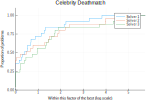

In [45]:
performance_profile(T, ["Solver 1", "Solver 2", "Solver 3"], title="Celebrity Deathmatch")

## Iterative Methods for Linear Systems

In [46]:
using Krylov

In [54]:
A = rand(10, 10); A = A * A';  # SPD
b = A * ones(10);

In [55]:
cg(A, b, verbose=true)

CG: system of 10 equations in 10 variables
    0   6.9e+01   1.1e+05  4.5e-02  4.5e-02
    1   4.7e-01   3.2e-01  7.0e-01  7.0e-01
    2   1.4e-01   1.2e-02  1.7e+00  1.7e+00
    3   8.6e-02   4.3e-03  1.7e+00  1.7e+00
    4   1.1e-02   6.2e-05  2.1e+00  2.1e+00
    5   6.4e-03   4.9e-05  8.3e-01  8.3e-01
    6   3.7e-03   2.0e-06  6.8e+00  6.8e+00
    7   3.9e-03   2.6e-06  5.9e+00  5.9e+00
    8   2.1e-03   2.5e-05  1.8e-01  1.8e-01
    9   3.7e-03   3.2e-06  4.2e+00  4.2e+00
   10   1.6e-03   5.4e-08  4.8e+01  4.8e+01
   11   1.4e-12  


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
Simple stats
  solved: true
  inconsistent: false
  residuals:  [  6.9e+01  4.7e-01  1.4e-01 ...  3.7e-03  1.6e-03  1.4e-12 ]
  Aresiduals: [ ]
  status: solution good enough given atol and rtol
)

We can also use CG to solve the trust-region subproblem

\begin{align*}
  \text{minimize} & \quad -b^T s + \tfrac{1}{2} s^T A s \\
  \text{subject to} & \quad \|s\| \leq \Delta
\end{align*}

In [56]:
cg(A, b, radius=3.14, verbose=true)  # add a trust-region constraint

CG: system of 10 equations in 10 variables
    0   6.9e+01   1.1e+05  4.5e-02  4.6e-02
    1   4.7e-01   3.2e-01  7.0e-01  1.0e+00
    2   1.4e-01   1.2e-02  1.7e+00  1.7e+00
    3   8.6e-02   4.3e-03  1.7e+00  3.6e-02
    4   8.4e-02  


([1.00371, 1.06263, 0.880546, 1.02432, 0.884777, 0.980492, 1.15366, 0.965662, 0.895031, 1.04389], 
Simple stats
  solved: true
  inconsistent: false
  residuals:  [  6.9e+01  4.7e-01  1.4e-01  8.6e-02  8.4e-02 ]
  Aresiduals: [ ]
  status: on trust-region boundary
)

In [57]:
norm(ans[1])

3.14

## How We Use Multiple Dispatch

`LDLFactorizations` is a package to compute the sparse symmetric quasi-definite factorization $A = L D L^T$ where $L$ is unit lower triangular and $D$ is diagonal. It is entirely implemented in Julia.

In [58]:
using LDLFactorizations

In [60]:
include("test_single.jl");  # factorize in single precision (32 bits)

  0.000232 seconds (26 allocations: 146.930 KiB)
  0.000233 seconds (26 allocations: 135.242 KiB)


In [61]:
LDL = ldl(A); LDL \ rhs  # solve system in single precision

550-element Array{Float32,1}:
 -0.5789374  
 -0.32080913 
  1.3764133  
  0.048997562
 -1.2743262  
  1.2484739  
 -0.6092489  
 -0.14004253 
  0.11015992 
 -1.6164333  
 -2.21149    
 -0.7528112  
 -0.942951   
  ⋮          
  5.409502   
  5.8863583  
  6.025995   
  6.184732   
  6.4798164  
  6.715082   
  6.132685   
  6.035061   
  6.50018    
  6.7561355  
  6.2833214  
  5.9471755  

In [62]:
include("test_half.jl");  # factorize in half precision (16 bits)

  0.000197 seconds (26 allocations: 146.930 KiB)
  0.000961 seconds (26 allocations: 129.305 KiB)


In [63]:
LDL = ldl(A); LDL \ rhs  # solve system in half precision

550-element Array{Float16,1}:
 -0.584  
 -0.3145 
  1.375  
  0.0388 
 -1.258  
  1.262  
 -0.6    
 -0.1425 
  0.10516
 -1.621  
 -2.209  
 -0.7646 
 -0.945  
  ⋮      
  5.4    
  5.89   
  6.016  
  6.18   
  6.477  
  6.715  
  6.14   
  6.035  
  6.516  
  6.758  
  6.277  
  5.945  

In [64]:
include("test_decfp.jl");  # factorize in quadruple precision (128 bits)

  0.000188 seconds (26 allocations: 146.930 KiB)
  0.011667 seconds (27 allocations: 170.445 KiB)


In [65]:
size(A)

(550, 550)

In [66]:
LDL = ldl(A); LDL \ rhs  # solve system in quadruple precision

550-element Array{Dec128,1}:
 -0.5789391676025727036119525262872784 
 -0.3208101540199521789701607901751622 
  1.376414859767523253206216405786593  
  0.04899936733303184911277963781911877
 -1.274320975430232834064193592198799  
  1.248474295107157207618319794749823  
 -0.609249181421566360699068384956126  
 -0.1400429306436350674374159160968927 
  0.1101574628995111406806425970340332 
 -1.616435167051859317450267578009796  
 -2.211489532112809898992816673122192  
 -0.7528123852596415572293967724437087 
 -0.942950952227431907593499507690086  
  ⋮                                    
  5.409500993813889248277311346870084  
  5.886357945021753283775785194177244  
  6.025995387146967183129843924247099  
  6.18473134441512939080862572383375   
  6.479816797165921931847593640661021  
  6.715081610297709619300327476582492  
  6.132687686243101322905588604113827  
  6.035061794935864832022909988276899  
  6.50017928014031901922533430303244   
  6.756134584795552832974261063508023  
  6.2833213

In [68]:
A = MatrixMarket.mmread("K_0.mtx");
rhs = readdlm("rhs_0.rhs")[:];
A = convert(SparseMatrixCSC{BigFloat,Int}, A);  # BigFloat is octo-precision: Float{256}!!!
rhs = convert(Vector{BigFloat}, rhs);

In [70]:
LDL = ldl(A);

In [71]:
LDL \ rhs

550-element Array{BigFloat,1}:
 -5.78939167602572703611952526287264436323601489878584940886473542437269326823301e-01 
 -3.208101540199521789701607901751662552152036667527653802143428659506691808077964e-01
  1.376414859767523253206216405786593052831197656232406062834026711404385642723487    
  4.899936733303184911277963781911914090352333381738089902370281958811705945904487e-02
 -1.27432097543023283406419359219883375128650942083332192556062013131740716573169     
  1.248474295107157207618319794749814607730718712147639771212638707371057829715484    
 -6.092491814215663606990683849561368895740575918530902632572456363576222590363879e-01
 -1.400429306436350674374159160968976874021817512767188508556132805536575466777125e-01
  1.101574628995111406806425970340360793327339609691208015466314861567234706630418e-01
 -1.61643516705185931745026757800979446350535066667217763136874463701186547883258     
 -2.211489532112809898992816673122202102420614734567756716839558976174689681405829    
 -7.52812385

## Other Packages

### Modeling Factilities for Nonlinear Least-Squares Problems

\begin{align*}
  \text{minimize} & \quad \tfrac{1}{2} \|F(x)\|^2 \\
  \text{subject to} & \quad c_L \leq c(x) \leq c_U \\
  & \quad \ell \leq x \leq u
\end{align*}

* Implemented as a JuMP extension

### Go Old School

* `QPSReader.jl`: read MPS and QPS files

### Factorization of Symmetric Indefinite Linear Systems

$$
\begin{bmatrix}
  H & A^T \\
  A & -C
\end{bmatrix}
$$

* `MUMPS.jl`: sequential or distributed (based on MPI)
* `HSL.jl`: MA97 (multi-core) and MA57 (multi-frontal)

### Limited-Memory Incomplete Cholesky

$$
  LL^T = A + E,
$$
where $\text{nnz}(L) = \text{nnz}(A) + np$.

* `LimitedLDLFactorizations.jl`: useful to construct preconditioners

